<a href="https://colab.research.google.com/github/Hemavathi22-HV/Hemavathi22-HV/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. BASIC DATASET EXPLORATION

Dataset shape: (1599, 12)

Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0 

/tmp/ipython-input-3648436626.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine, palette='viridis')


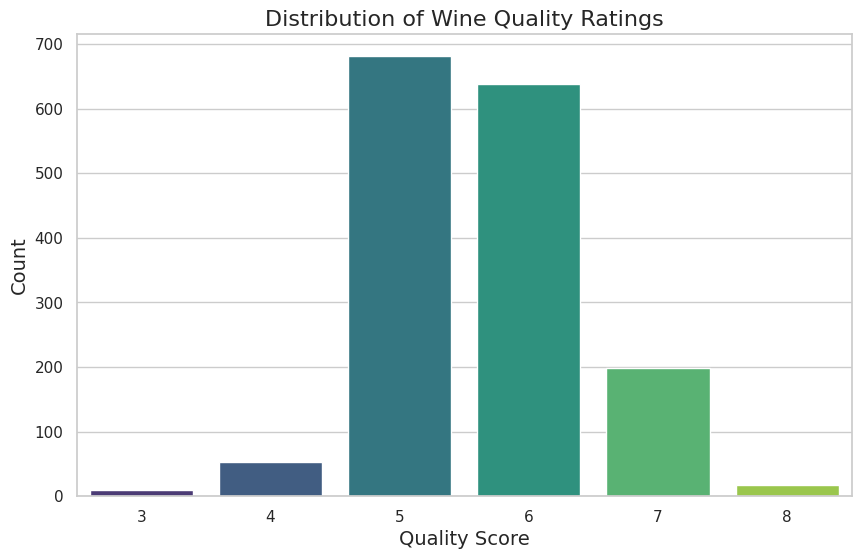

/tmp/ipython-input-3648436626.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality_category', data=wine, palette='viridis', order=['Low', 'Medium', 'High'])



Quality value counts:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


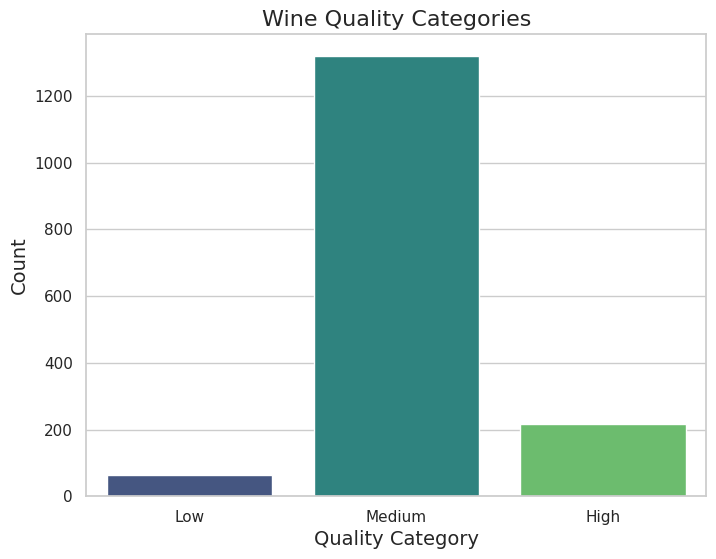


3. FEATURE ANALYSIS


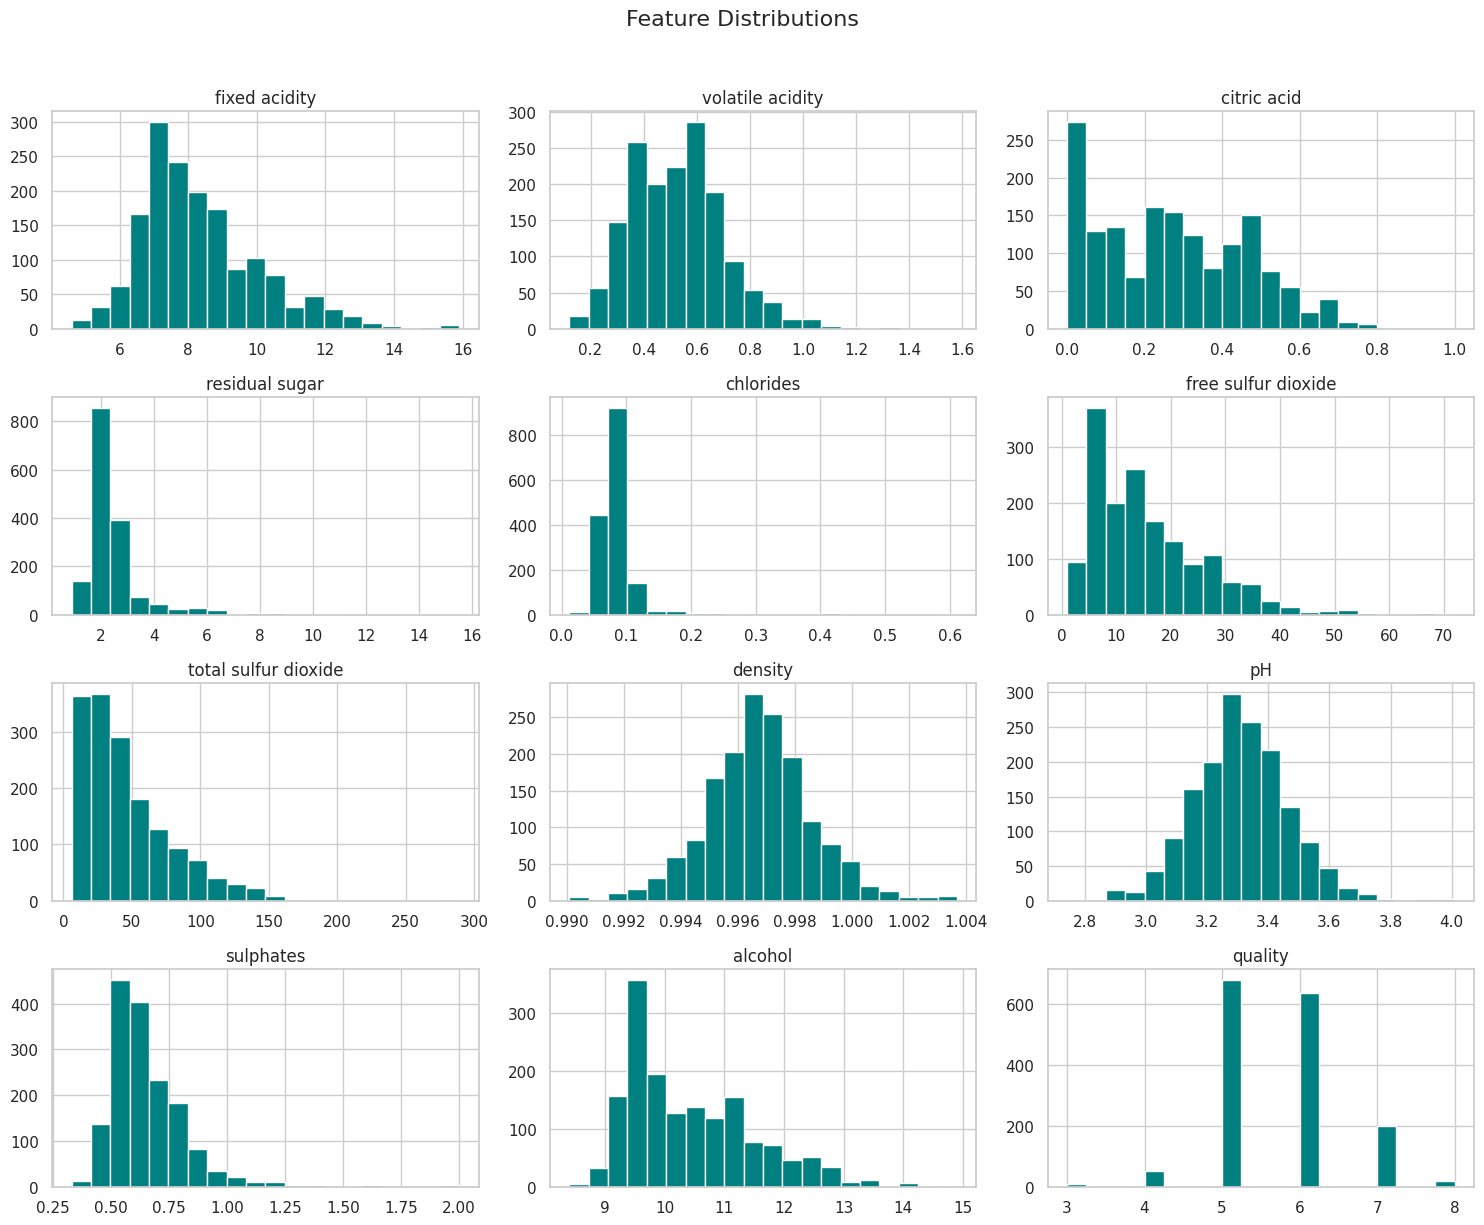

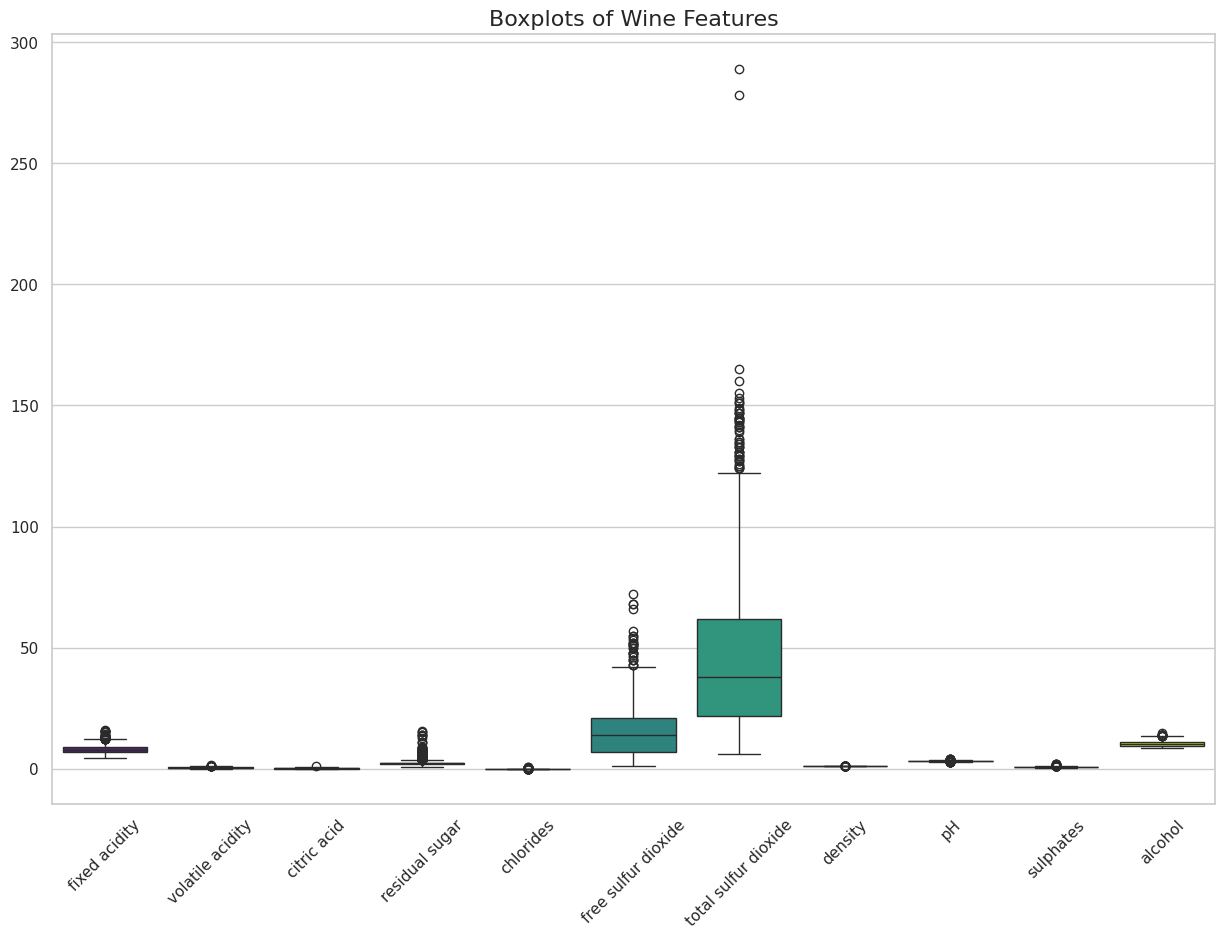


4. ACIDIC PROPERTIES ANALYSIS

Summary statistics for acidic features:
                   count      mean       std   min   25%   50%   75%    max
fixed acidity     1599.0  8.319637  1.741096  4.60  7.10  7.90  9.20  15.90
volatile acidity  1599.0  0.527821  0.179060  0.12  0.39  0.52  0.64   1.58
citric acid       1599.0  0.270976  0.194801  0.00  0.09  0.26  0.42   1.00
pH                1599.0  3.311113  0.154386  2.74  3.21  3.31  3.40   4.01


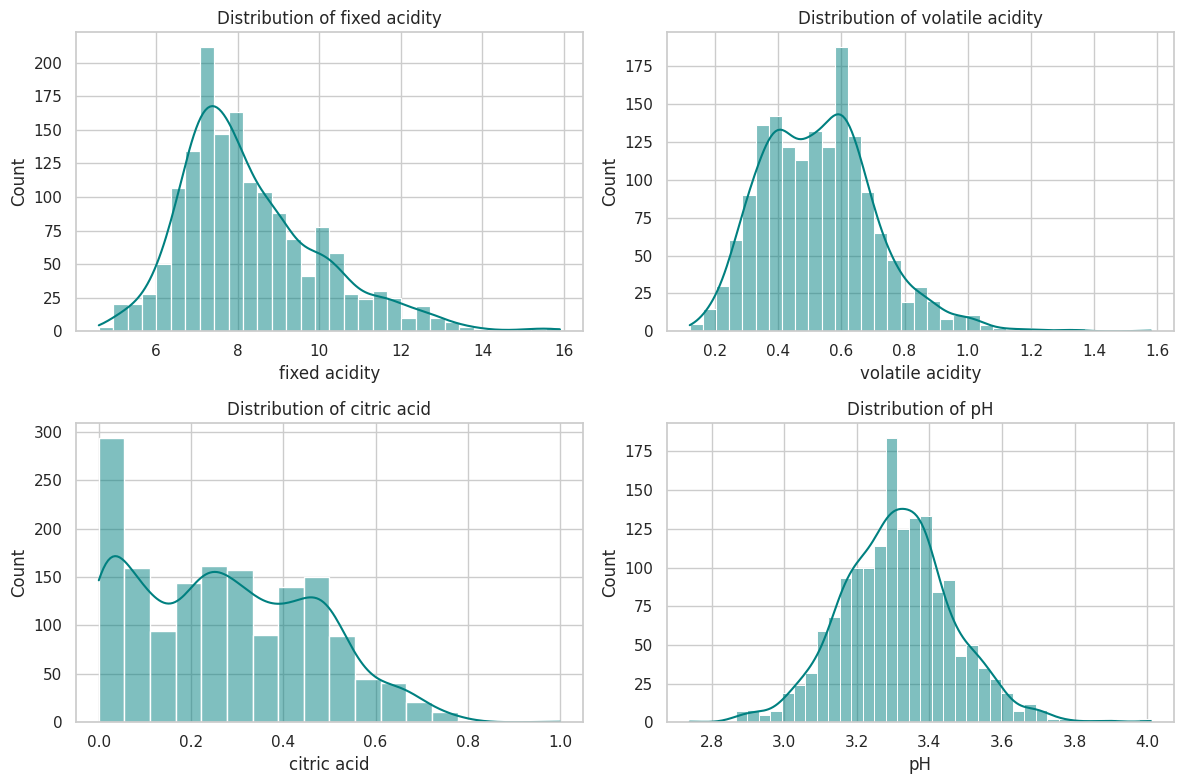

/tmp/ipython-input-3648436626.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=wine, palette='viridis')
/tmp/ipython-input-3648436626.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=wine, palette='viridis')
/tmp/ipython-input-3648436626.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=wine, palette='viridis')
/tmp/ipython-input-3648436626.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in

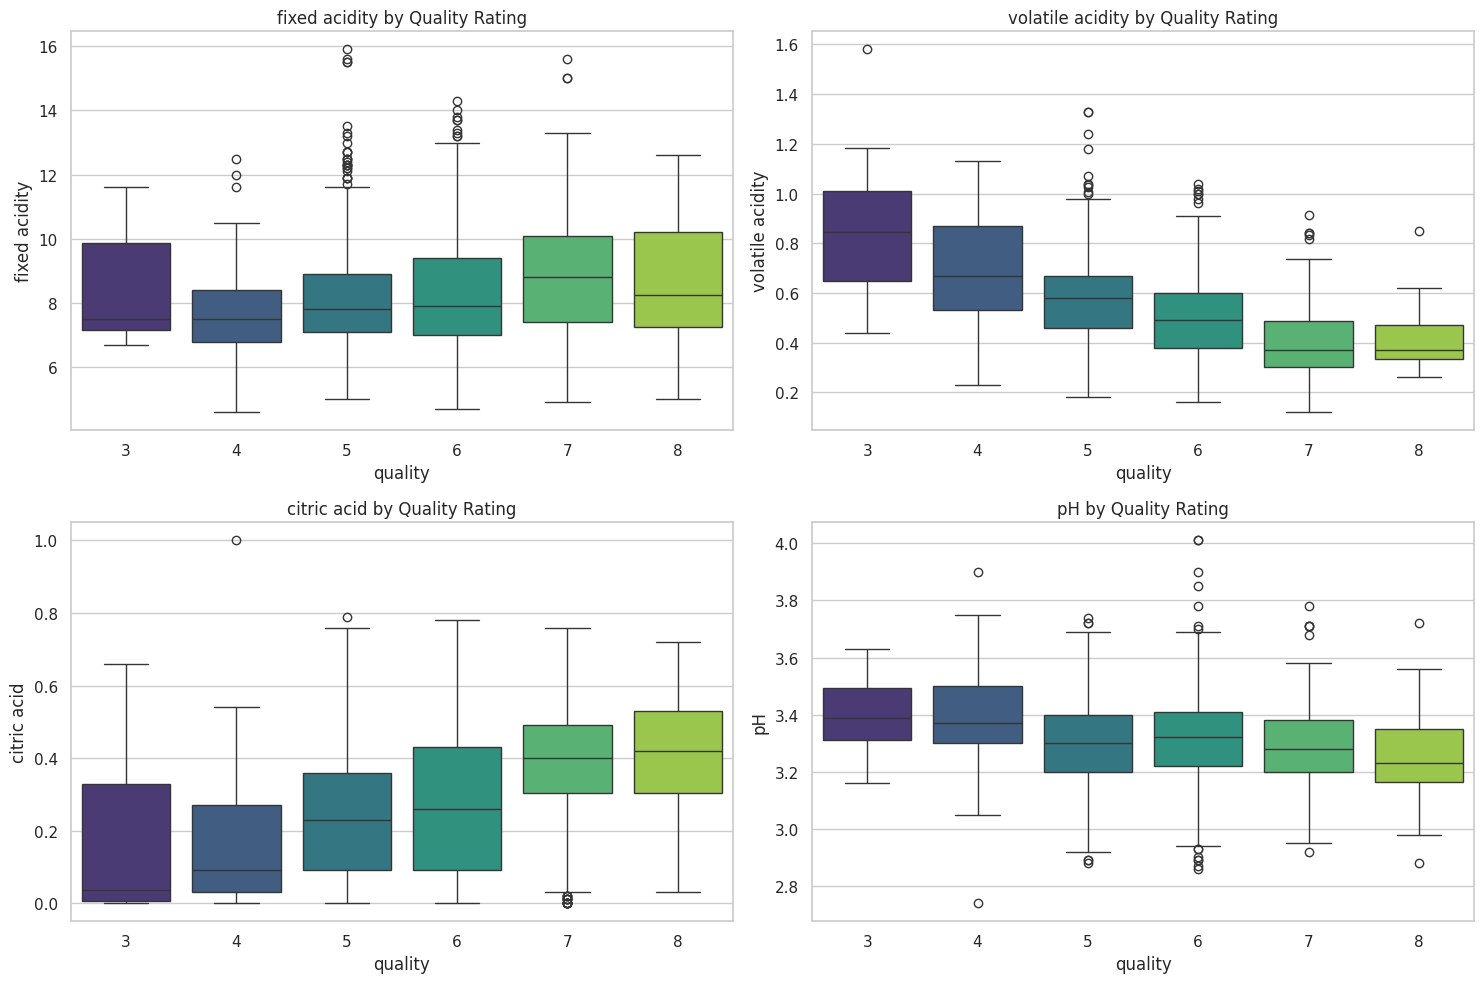

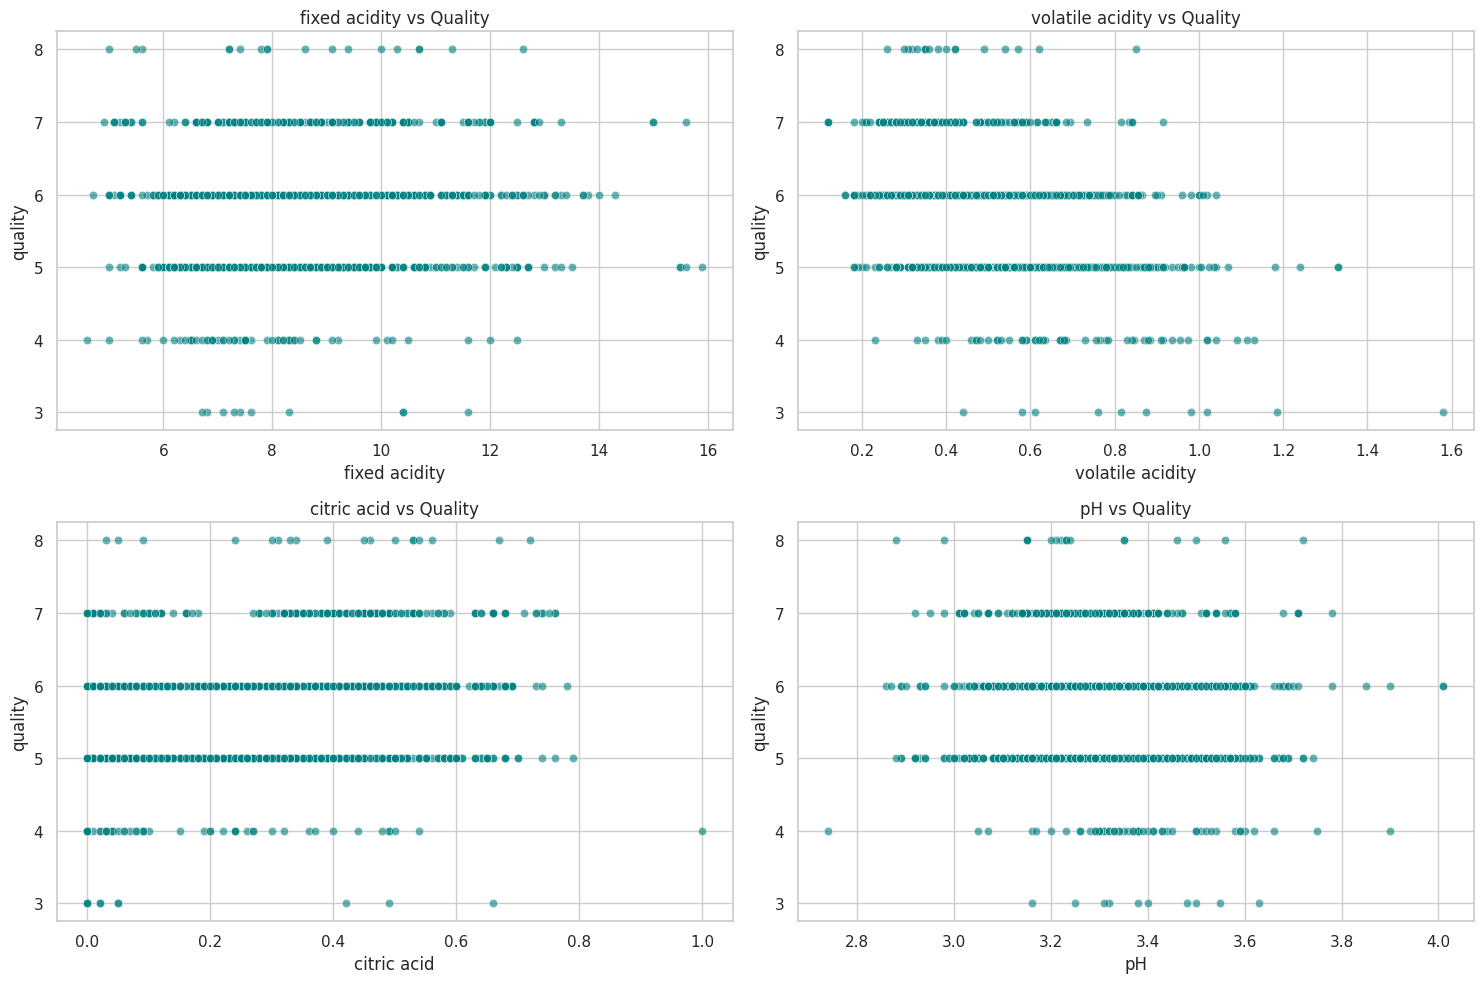

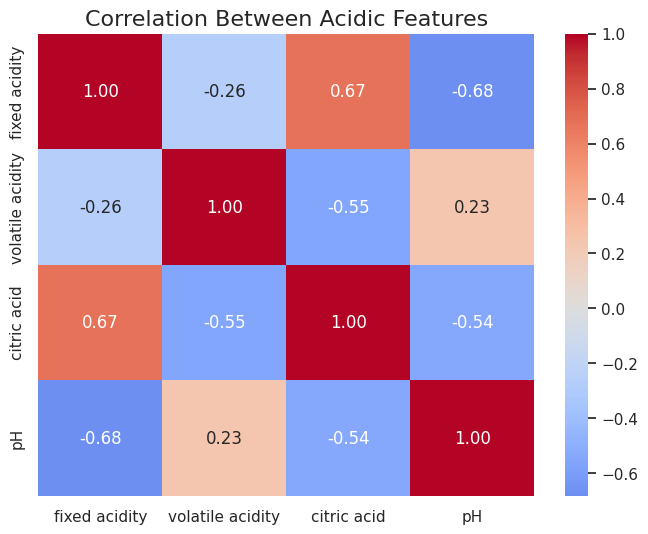


5. CITRIC ACID SPECIAL ANALYSIS


/tmp/ipython-input-3648436626.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_category', y='citric acid', data=wine,


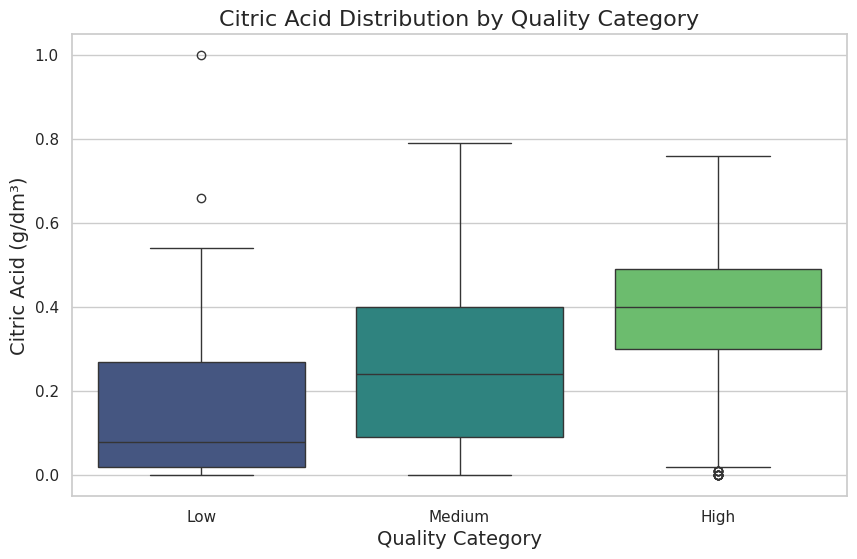


Citric acid correlation with other features:
citric acid             1.000000
fixed acidity           0.671703
density                 0.364947
sulphates               0.312770
quality                 0.226373
chlorides               0.203823
residual sugar          0.143577
alcohol                 0.109903
total sulfur dioxide    0.035533
free sulfur dioxide    -0.060978
pH                     -0.541904
volatile acidity       -0.552496
Name: citric acid, dtype: float64

6. CORRELATION ANALYSIS


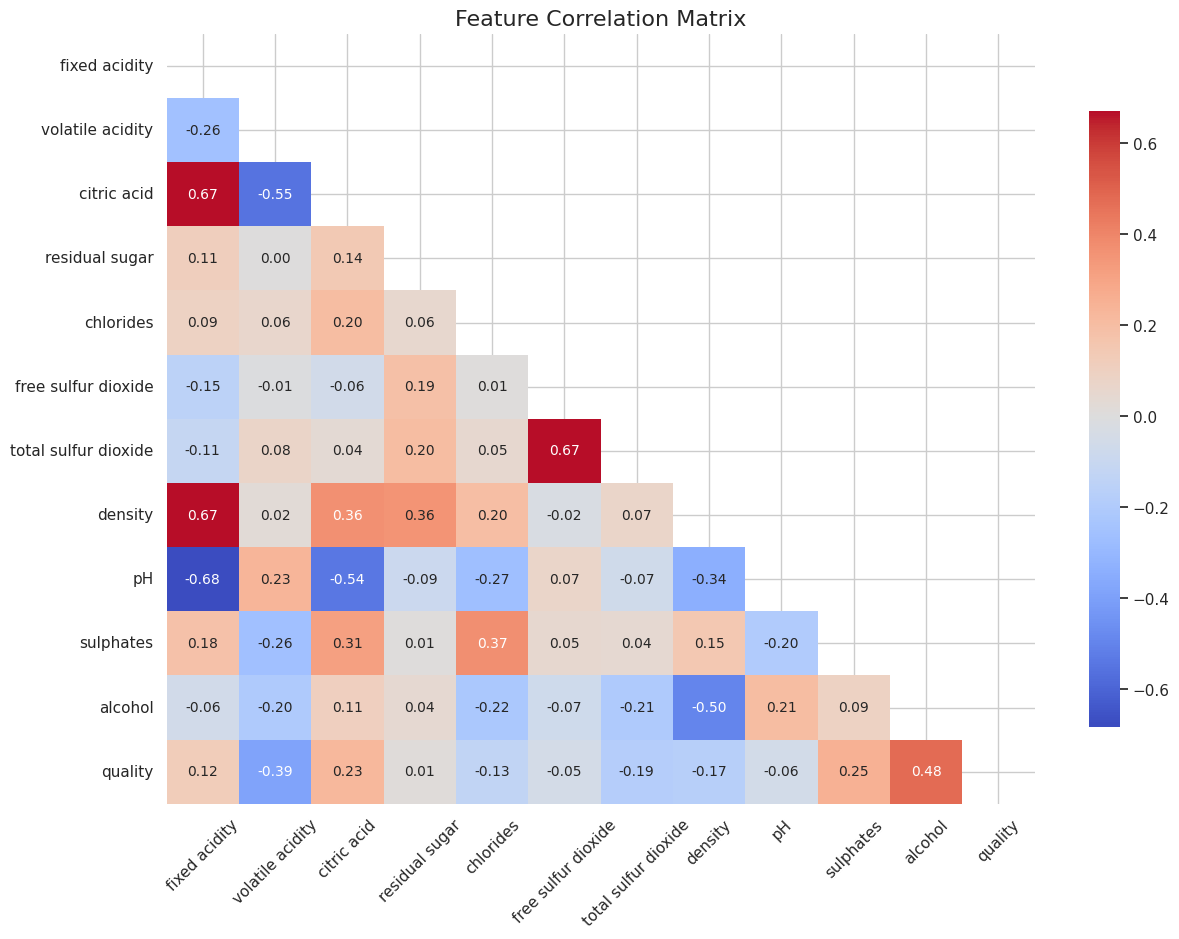


Correlation with quality:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

8. PAIRWISE RELATIONSHIPS


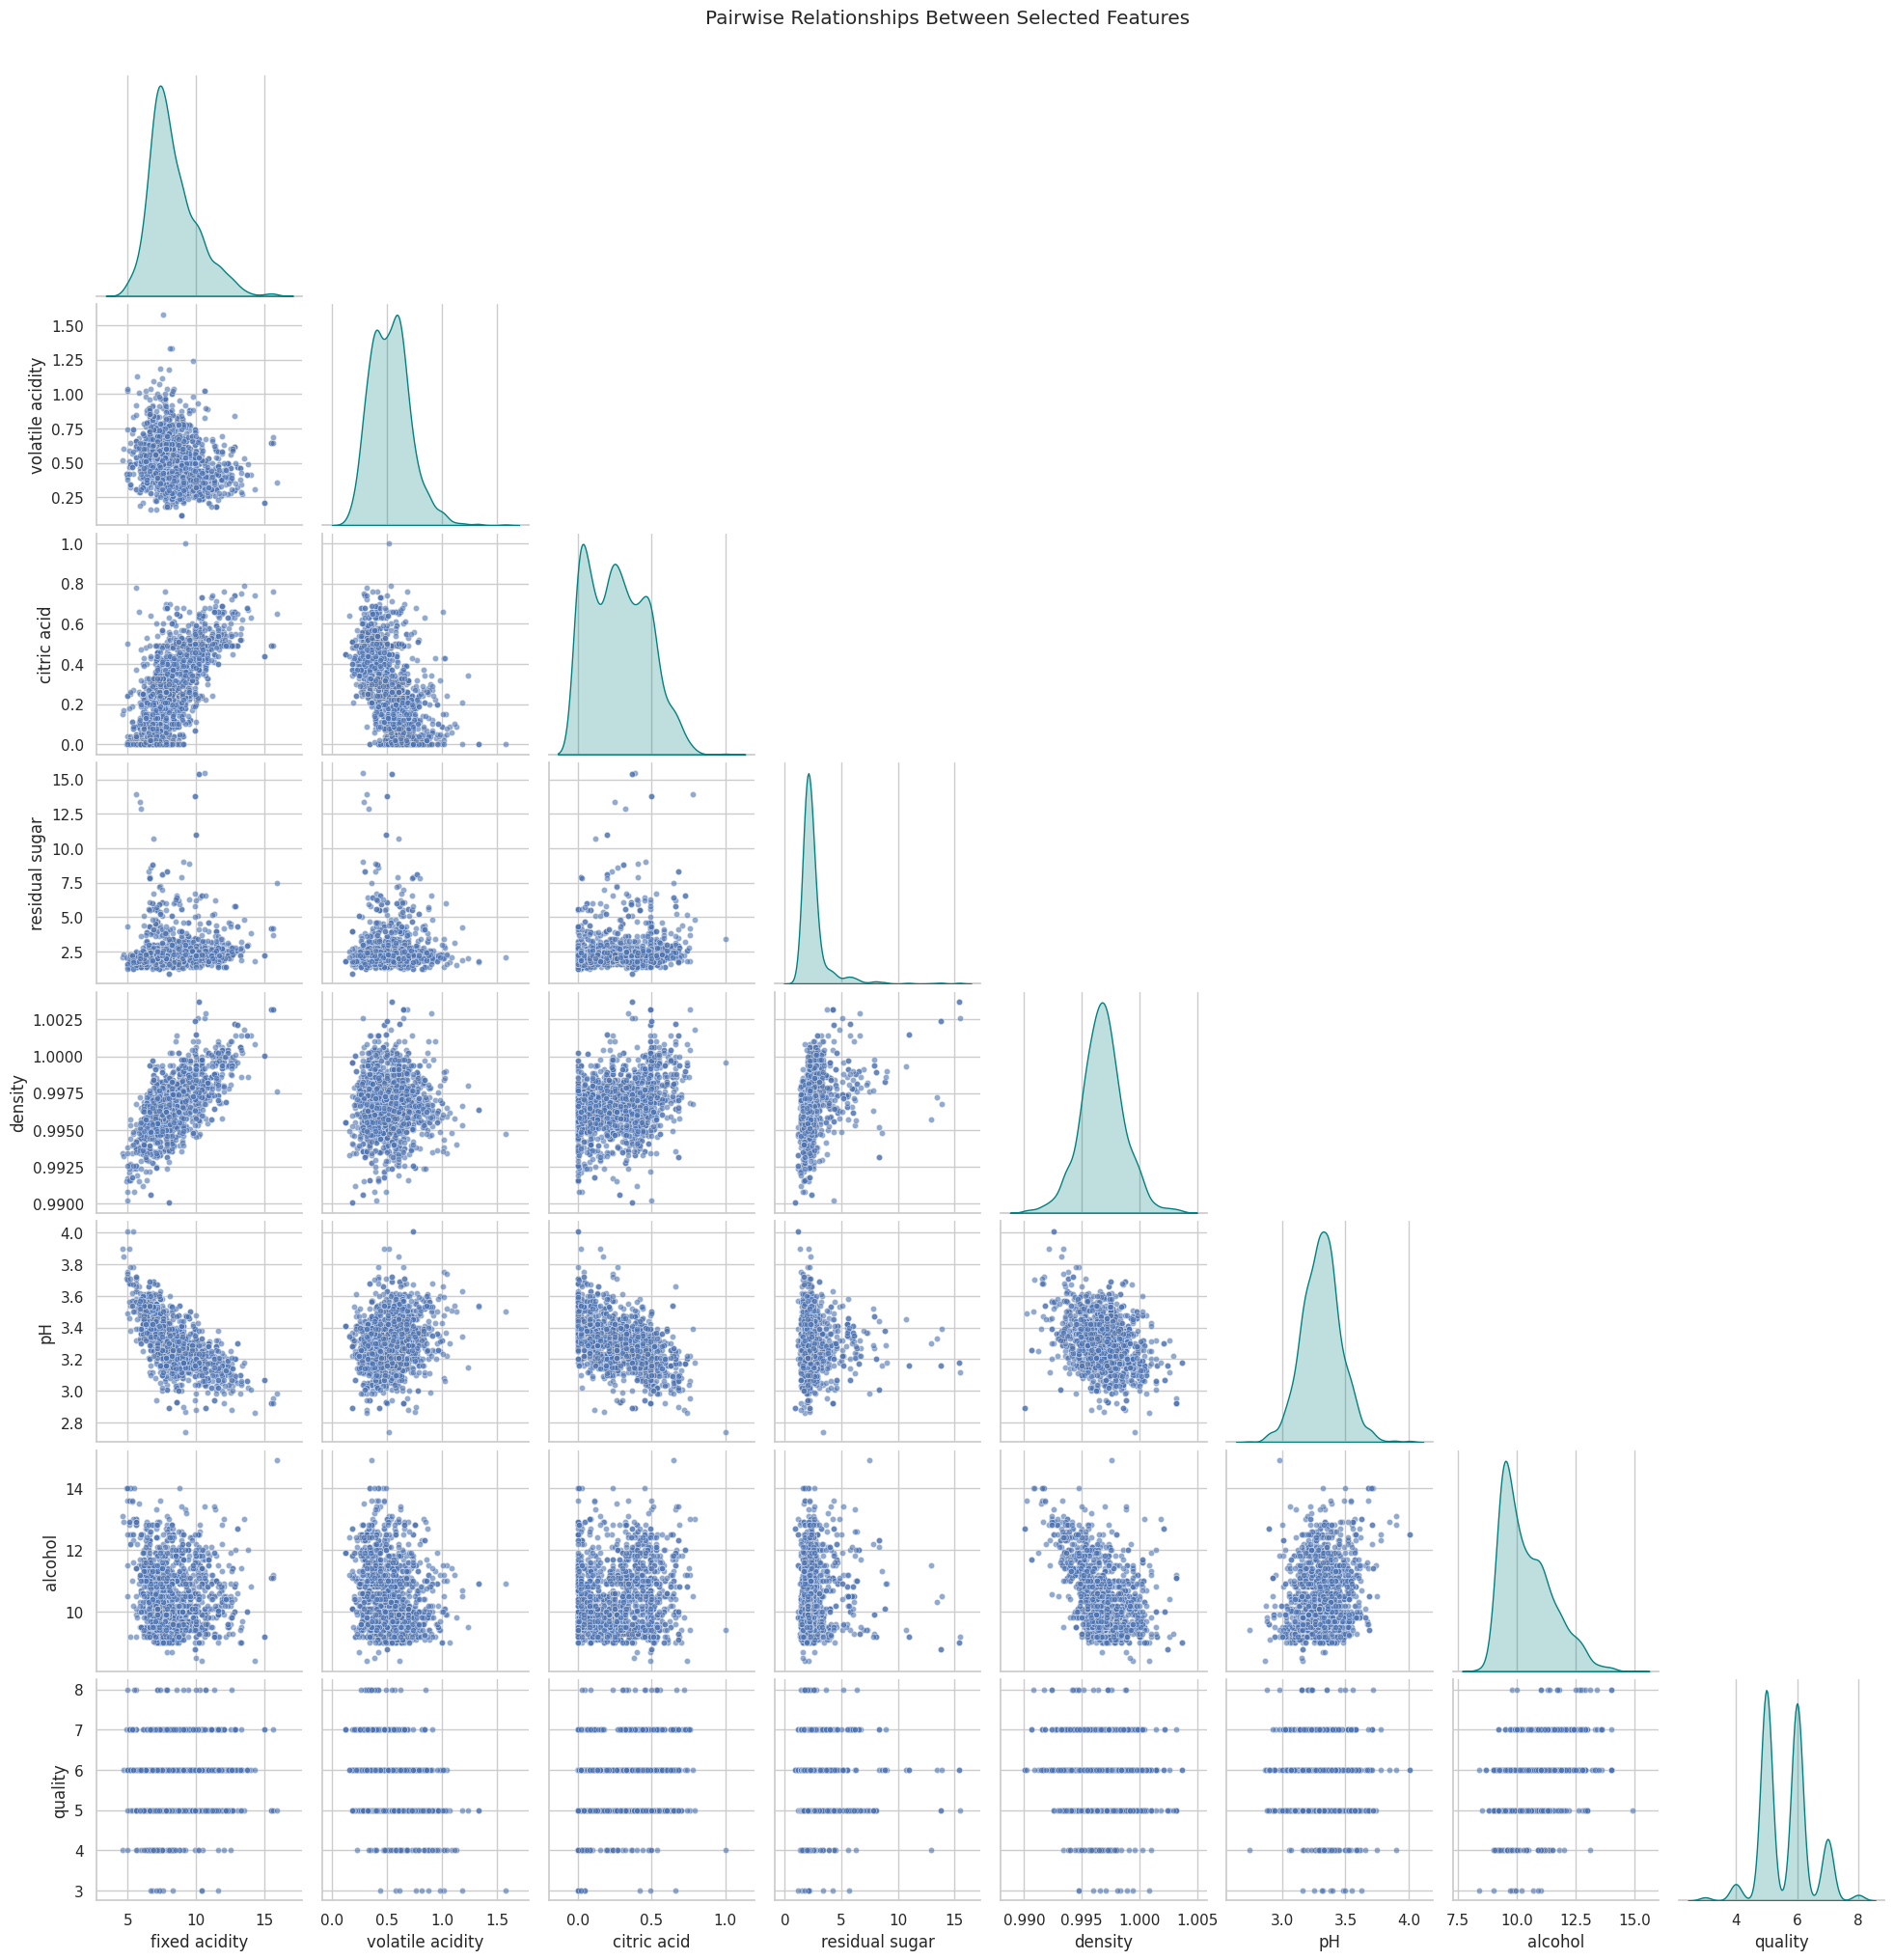

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(url, sep=';')

## 1. Basic Dataset Exploration
print("="*50)
print("1. BASIC DATASET EXPLORATION")
print("="*50)

# Shape and columns
print(f"\nDataset shape: {wine.shape}")
print(f"\nColumns: {wine.columns.tolist()}")

# First few rows
print("\nFirst 5 rows:")
print(wine.head())

# Data types and missing values
print("\nData types and missing values:")
print(wine.info())

# Descriptive statistics
print("\nDescriptive statistics:")
print(wine.describe().T)

## 2. Target Variable Analysis (Quality)
print("\n" + "="*50)
print("2. TARGET VARIABLE ANALYSIS (QUALITY)")
print("="*50)

# Distribution of quality ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine, palette='viridis')
plt.title('Distribution of Wine Quality Ratings', fontsize=16)
plt.xlabel('Quality Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Quality statistics
print("\nQuality value counts:")
print(wine['quality'].value_counts().sort_index())

# Create quality categories
wine['quality_category'] = pd.cut(wine['quality'], bins=[0, 4, 6, 10],
                                  labels=['Low', 'Medium', 'High'])

# Plot quality categories
plt.figure(figsize=(8, 6))
sns.countplot(x='quality_category', data=wine, palette='viridis', order=['Low', 'Medium', 'High'])
plt.title('Wine Quality Categories', fontsize=16)
plt.xlabel('Quality Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## 3. Feature Analysis
print("\n" + "="*50)
print("3. FEATURE ANALYSIS")
print("="*50)

# Histograms for all features
wine.hist(bins=20, figsize=(15, 12), color='teal')
plt.suptitle('Feature Distributions', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Boxplots for all features
plt.figure(figsize=(15, 10))
sns.boxplot(data=wine.drop('quality', axis=1), palette='viridis')
plt.title('Boxplots of Wine Features', fontsize=16)
plt.xticks(rotation=45)
plt.show()

## 4. Acidic Properties Analysis
print("\n" + "="*50)
print("4. ACIDIC PROPERTIES ANALYSIS")
print("="*50)

acidic_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'pH']

# Summary statistics for acidic features
print("\nSummary statistics for acidic features:")
print(wine[acidic_features].describe().T)

# Acidic features distribution
plt.figure(figsize=(12, 8))
for i, feature in enumerate(acidic_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(wine[feature], kde=True, color='teal')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Acidic features vs quality
plt.figure(figsize=(15, 10))
for i, feature in enumerate(acidic_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='quality', y=feature, data=wine, palette='viridis')
    plt.title(f'{feature} by Quality Rating')
plt.tight_layout()
plt.show()

# Scatter plots for acidic features vs quality
plt.figure(figsize=(15, 10))
for i, feature in enumerate(acidic_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=feature, y='quality', data=wine, alpha=0.6, color='teal')
    plt.title(f'{feature} vs Quality')
plt.tight_layout()
plt.show()

# Correlation between acidic features
acidic_corr = wine[acidic_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(acidic_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Between Acidic Features', fontsize=16)
plt.show()

## 5. Citric Acid Special Analysis
print("\n" + "="*50)
print("5. CITRIC ACID SPECIAL ANALYSIS")
print("="*50)

# Citric acid distribution by quality category
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality_category', y='citric acid', data=wine,
            palette='viridis', order=['Low', 'Medium', 'High'])
plt.title('Citric Acid Distribution by Quality Category', fontsize=16)
plt.xlabel('Quality Category', fontsize=14)
plt.ylabel('Citric Acid (g/dm³)', fontsize=14)
plt.show()

# Citric acid correlation with other features
citric_corr = wine.drop('quality_category', axis=1).corr()['citric acid'].sort_values(ascending=False)
print("\nCitric acid correlation with other features:")
print(citric_corr)

## 6. Correlation Analysis
print("\n" + "="*50)
print("6. CORRELATION ANALYSIS")
print("="*50)

# Full correlation matrix
plt.figure(figsize=(14, 10))
corr = wine.drop('quality_category', axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            annot_kws={'size': 10}, cbar_kws={'shrink': .8})
plt.title('Feature Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Top correlations with quality
quality_corr = wine.drop('quality_category', axis=1).corr()['quality'].sort_values(ascending=False)
print("\nCorrelation with quality:")
print(quality_corr)

## 8. Pairwise Relationships
print("\n" + "="*50)
print("8. PAIRWISE RELATIONSHIPS")
print("="*50)

# Select a subset of features for pairplot
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                    'density', 'pH', 'alcohol', 'quality']

sns.pairplot(wine[selected_features], corner=True, diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 20}, diag_kws={'color': 'teal'})
plt.suptitle('Pairwise Relationships Between Selected Features', y=1.02)
plt.show()